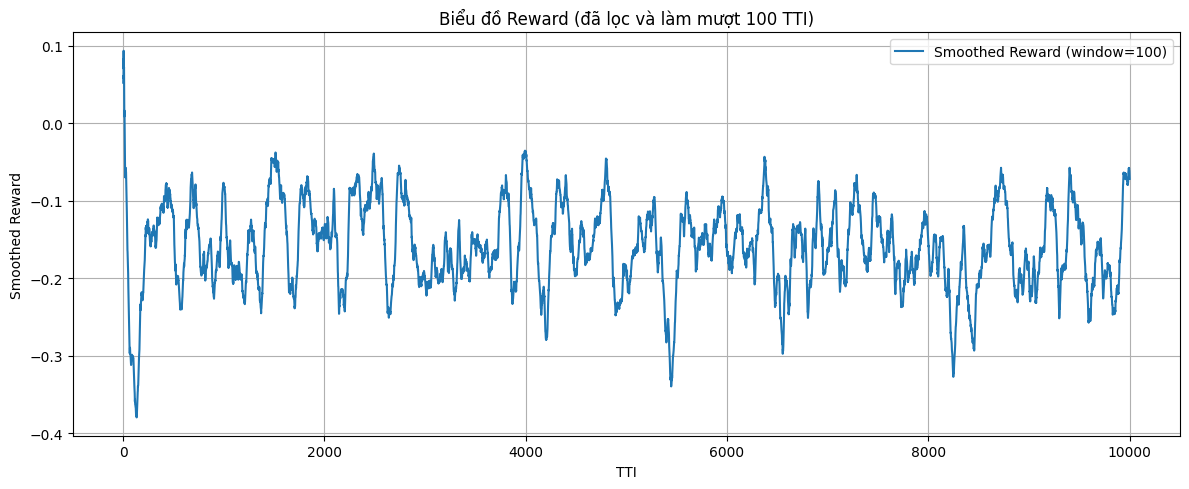

In [5]:
# Đọc lại file reward
import pandas as pd
import matplotlib.pyplot as plt

file_path = "./Simulation/Qlearning/result/reward_log_test.csv"
df = pd.read_csv(file_path)

# Loại bỏ giá trị quá lớn hoặc quá nhỏ
df_filtered = df[(df["Reward"] > -1) & (df["Reward"] < 1)].copy()

# Làm mượt reward bằng trung bình động trên 100 TTI
df_filtered["Smoothed_Reward"] = df_filtered["Reward"].rolling(window=100, min_periods=1).mean()

# Vẽ biểu đồ reward đã làm mượt
plt.figure(figsize=(12, 5))
plt.plot(df_filtered["TTI"], df_filtered["Smoothed_Reward"], label="Smoothed Reward (window=100)", linewidth=1.5)
plt.xlabel("TTI")
plt.ylabel("Smoothed Reward")
plt.title("Biểu đồ Reward (đã lọc và làm mượt 100 TTI)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




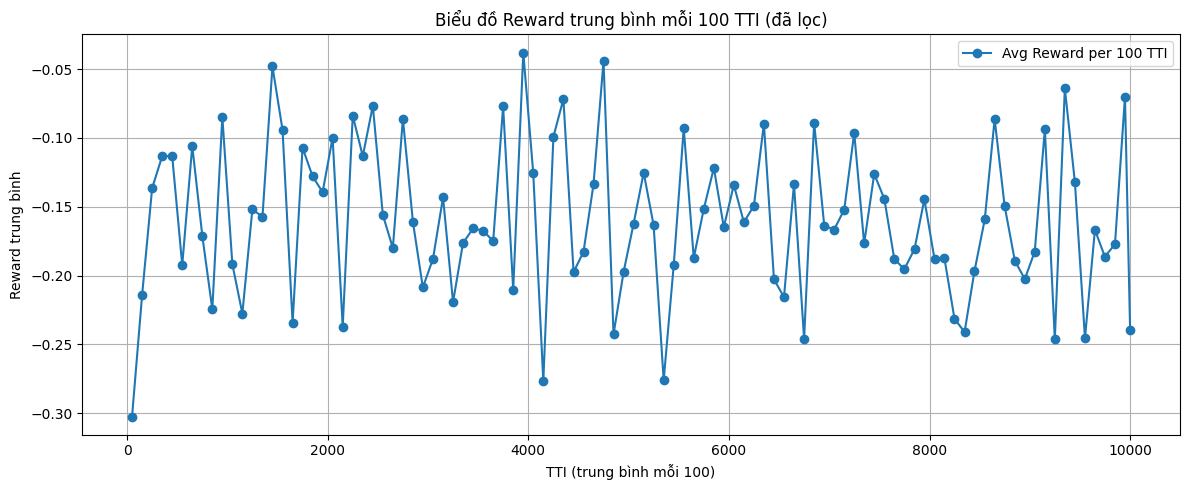

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file reward
file_path = "./Simulation/Qlearning/result/reward_log_test.csv"
df = pd.read_csv(file_path)

# Lọc bỏ các giá trị quá lớn hoặc quá nhỏ
df_filtered = df[(df["Reward"] > -1) & (df["Reward"] < 1)].copy()

# Tính trung bình mỗi 100 TTI
df_filtered["Group"] = df_filtered["TTI"] // 100
df_grouped = df_filtered.groupby("Group").agg({
    "TTI": "mean",
    "Reward": "mean"
}).reset_index(drop=True)

# Vẽ biểu đồ trung bình mỗi 100 TTI
plt.figure(figsize=(12, 5))
plt.plot(df_grouped["TTI"], df_grouped["Reward"], marker='o', label="Avg Reward per 100 TTI")
plt.xlabel("TTI (trung bình mỗi 100)")
plt.ylabel("Reward trung bình")
plt.title("Biểu đồ Reward trung bình mỗi 100 TTI (đã lọc)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
